In [ ]:
!pip uninstall tensorflow -y
!pip install tensorflow==1.14
!pip uninstall keras -y
!pip install keras==2.2.5
!pip install h5py==2.10.0

Found existing installation: tensorflow 1.14.0
Uninstalling tensorflow-1.14.0:
  Successfully uninstalled tensorflow-1.14.0
  Using cached tensorflow-1.14.0-cp37-cp37m-manylinux1_x86_64.whl (109.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.6 requires tensorflow>=2.0.0, but you have tensorflow 1.14.0 which is incompatible.
Found existing installation: Keras 2.2.5
Uninstalling Keras-2.2.5:
  Successfully uninstalled Keras-2.2.5
  Using cached Keras-2.2.5-py2.py3-none-any.whl (336 kB)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -qq "/content/drive/MyDrive/Colab Notebooks/Video.zip"

replace Video/train_01102_135.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Video/train_00776_090.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Video/train_04522_090.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Video/train_00400_090.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Video/train_00043_135.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Video/train_01062_090.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Video/train_02765_045.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace Video/train_02765_045.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Video/train_04229_045.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Video/train_01627_090.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Video/train_04001_090.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Video/train_02692_090.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Video/train_01696_135.png? [y]es, [n]o, [A]ll, [N]one, [r]

In [ ]:
import os
import random
import fnmatch
import datetime
import pickle

import numpy as np
np.set_printoptions(formatter={'float_kind':lambda x: "%.4f" %x})

In [ ]:
import pandas as pd 
pd.set_option('display.width',300)
pd.set_option('display.float_format','{:.4f}'.format)
pd.set_option('display.max_colwidth',200)

In [ ]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

#print(f 'tf.__version__: {tf.__version__}' )
#print(f '.keras.__version: {tensorflow.keras.__version__}' )

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
import cv2
from imgaug import augmenters as img_aug
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [ ]:
data_dir = '/content/Video'
file_list = os.listdir(data_dir)
image_paths = []
steering_angles=[]
pattern="*.png"
for filename in file_list:
    if fnmatch.fnmatch(filename, pattern):
        image_paths.append(os.path.join(data_dir,filename))
        angle=int(filename[-7:-4])
        steering_angles.append(angle)

In [ ]:
image_index=20
plt.show(Image.open(image_paths[image_index]))
print("image_path: %s" %image_paths[image_index])
print("steering_angle: %d" %steering_angles[image_index])
df=pd.DataFrame()
df['ImagePath']=image_paths
df['Angle']=steering_angles

image_path: /content/Video/train_04414_090.png
steering_angle: 90


(array([390.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 2997.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        1248.0000]),
 array([45.0000, 48.6000, 52.2000, 55.8000, 59.4000, 63.0000, 66.6000,
        70.2000, 73.8000, 77.4000, 81.0000, 84.6000, 88.2000, 91.8000,
        95.4000, 99.0000, 102.6000, 106.2000, 109.8000, 113.4000, 117.0000,
        120.6000, 124.2000, 127.8000, 131.4000, 135.0000]),
 <a list of 25 Patch objects>)

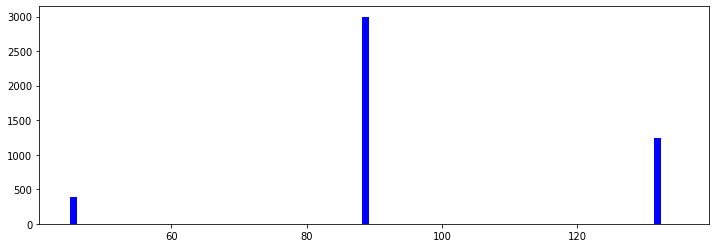

In [ ]:
num_of_bins=25
hist,bins=np.histogram(df['Angle'],num_of_bins)
fig,axes=plt.subplots(1,1,figsize=(12,4))
axes.hist(df['Angle'],bins=num_of_bins, width=1, color='blue')

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths,steering_angles, test_size=0.2)
print("Training data: %d\nValidation data: %d" %(len(X_train),len(X_valid)))

Training data: 3708
Validation data: 927


Text(0.5, 1.0, 'Validation Data')

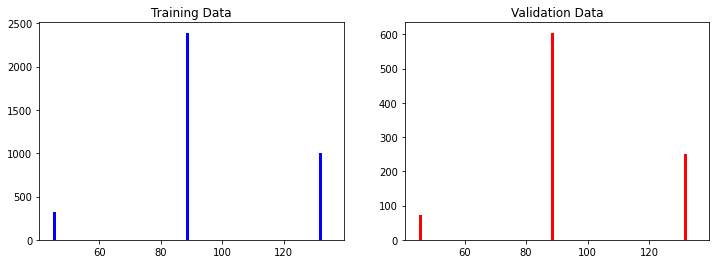

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].hist(y_train, bins=num_of_bins, width=1, color='blue')
axes[0].set_title('Training Data')
axes[1].hist(y_valid, bins=num_of_bins, width=1, color='red')
axes[1].set_title('Validation Data')

In [ ]:
def my_imread(image_path):
    image = cv2.imread(image_path)
    return image

def img_preprocess(image):
    image=image/255
    image = cv2.resize(image, (200,66))
    return image

Text(0.5, 1.0, 'processed')

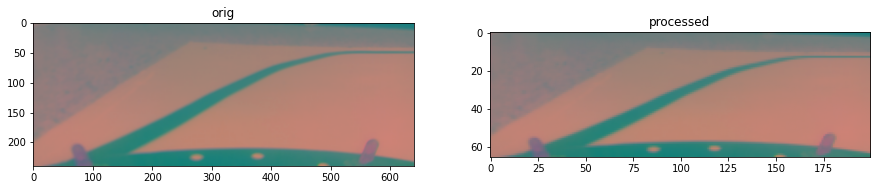

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,10))
image_orig=my_imread(image_paths[image_index])
image_processed=img_preprocess(image_orig)
axes[0].imshow(image_orig)
axes[0].set_title("orig")
axes[1].imshow(image_processed)
axes[1].set_title("processed")

In [ ]:
def nvidia_model():
    model = Sequential(name='Nvidia_Model')
    model.add(Conv2D(24,(5,5), strides=(2,2),input_shape=(66,200,3), activation='elu'))
    model.add(Conv2D(36,(5,5), strides=(2,2), activation='elu'))
    model.add(Conv2D(64,(3,3), activation='elu'))
    model.add(Dropout(0.2))
    model.add(Conv2D(64,(3,3), activation='elu'))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='elu'))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(10, activation='elu'))
    model.add(Dense(1))
    
    optimizer=Adam(lr=1e-3)
    model.compile(loss='mse', optimizer=optimizer)
    
    return model
model =nvidia_model()
print(model.summary())

Model: "Nvidia_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 45, 64)        20800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 45, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 43, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 27520)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 27520)            

In [ ]:
def image_data_generator(image_paths, steering_angles, batch_size):
    while True:
        batch_images = []
        batch_steering_angles = []
        
        for i in range(batch_size):
            random_index=random.randint(0,len(image_paths)-1)
            image_path=image_paths[random_index]
            image=my_imread(image_paths[random_index])
            steering_angle = steering_angles[random_index]
            
            image = img_preprocess(image)
            batch_images.append(image)
            batch_steering_angles.append(steering_angle)
        yield(np.asarray(batch_images), np.asarray(batch_steering_angles))

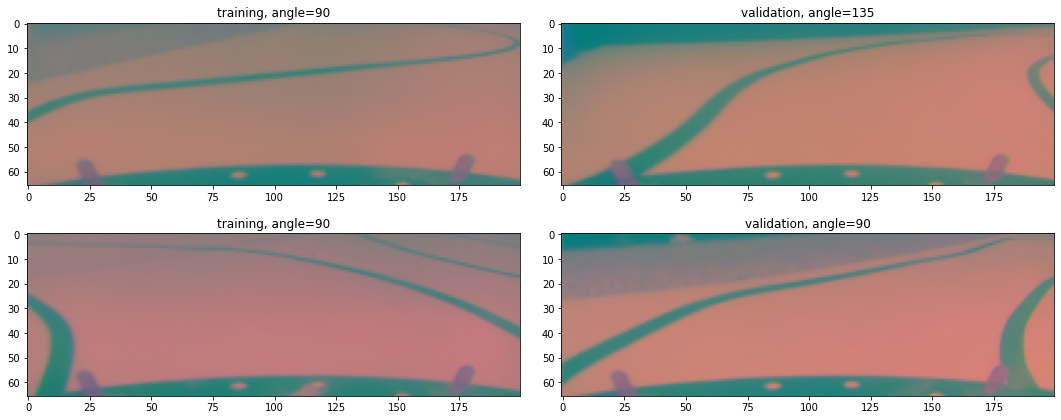

In [ ]:
ncol = 2
nrow = 2

X_train_batch, y_train_batch = next(image_data_generator(X_train, y_train, nrow))
X_valid_batch, y_valid_batch = next(image_data_generator(X_valid, y_valid, nrow))

fig, axes = plt.subplots(nrow, ncol, figsize=(15,6))
fig.tight_layout()

for i in range(nrow):
    axes[i][0].imshow(X_train_batch[i])
    axes[i][0].set_title("training, angle=%s" %y_train_batch[i])
    axes[i][1].imshow(X_valid_batch[i])
    axes[i][1].set_title("validation, angle=%s" %y_valid_batch[i])

In [ ]:
model_output_dir = "/content/drive/MyDrive/Colab Notebooks"
checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(filepath=os.path.join(model_output_dir,'lane_navigation_check.h5'), verbose=1, save_best_only=True)

In [38]:
history = model.fit_generator(image_data_generator(X_train, y_train, batch_size=100), steps_per_epoch=300, epochs=10, validation_data = image_data_generator(X_valid, y_valid, batch_size=100),validation_steps=200, verbose=1, shuffle=1, callbacks=[checkpoint_callback])

Epoch 1/10
299/300 [============================>.] - ETA: 1s - loss: 247.5399
Epoch 00001: val_loss improved from inf to 190.79717, saving model to /content/drive/MyDrive/Colab Notebooks/lane_navigation_check.h5
300/300 [==============================] - 621s 2s/step - loss: 247.1433 - val_loss: 190.7972
Epoch 2/10
299/300 [============================>.] - ETA: 1s - loss: 82.4941
Epoch 00002: val_loss improved from 190.79717 to 76.94693, saving model to /content/drive/MyDrive/Colab Notebooks/lane_navigation_check.h5
300/300 [==============================] - 616s 2s/step - loss: 82.3196 - val_loss: 76.9469
Epoch 3/10
299/300 [============================>.] - ETA: 1s - loss: 48.4097
Epoch 00003: val_loss improved from 76.94693 to 45.37128, saving model to /content/drive/MyDrive/Colab Notebooks/lane_navigation_check.h5
300/300 [==============================] - 612s 2s/step - loss: 48.3102 - val_loss: 45.3713
Epoch 4/10
299/300 [============================>.] - ETA: 1s - loss: 30.307

In [39]:
model.save(os.path.join(model_output_dir,'lane_navigation_final.h5'))

In [40]:
history_path = os.path.join(model_output_dir, 'history.pickle')
with open(history_path, 'wb') as f:
  pickle.dump(history.history, f, pickle.HIGHEST_PROTOCOL)

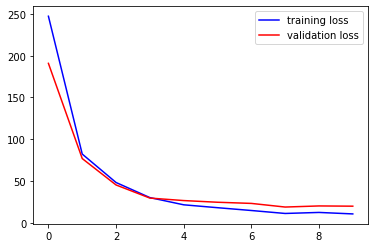

In [44]:
#history.history

history_path=os.path.join(model_output_dir,'history.pickle')
with open(history_path, 'rb') as f:
  history = pickle.load(f)

history
plt.plot(history['loss'], color='blue')
plt.plot(history['val_loss'], color='red')
plt.legend(["training loss","validation loss"])

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

def summarize_prediction(Y_true, Y_pred):
  mse = mean_squared_error(Y_true, Y_pred)
  r_squared = r2_score(Y_true, Y_pred)

  print(f'mse={mse:.2}')
  print(f'r_squared={r_squared:.2%}')
  print()

In [46]:
def predict_and_summarize(X,Y):
  model=load_model(f'{model_output_dir}/lane_navigation_check.h5')
  Y_pred = model.predict(X)
  summarize_prediction(Y, Y_pred)
  return Y_pred

mse=1.9e+01
r_squared=96.79%



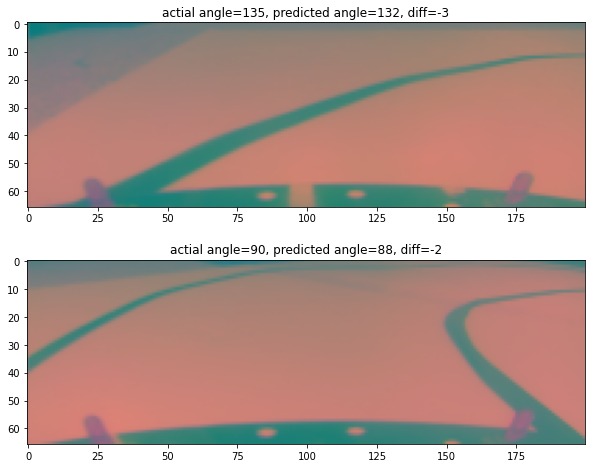

In [52]:
n_tests = 100
X_test, y_test = next(image_data_generator(X_valid, y_valid, 100))

y_pred = predict_and_summarize(X_test,y_test)

n_tests_show=2
fig,axes=plt.subplots(n_tests_show,1,figsize=(10,4*n_tests_show))
for i in range(n_tests_show):
  axes[i].imshow(X_test[i])
  axes[i].set_title(f"actial angle={y_test[i]}, predicted angle={int(y_pred[i])}, diff={int(y_pred[i])-y_test[i]}")